In [10]:
import os
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
import numpy as np
import tifffile as tiff
import CellTracker.trackerlite as trl
import CellTracker.stardistwrapper as sdw
import CellTracker.coord_image_transformer as cit
from CellTracker.analyses import draw_signals



In [11]:
stardist_model_name = "20231101-185322tdTomato_2000umdz"

model = sdw.load_stardist_model(model_name=stardist_model_name)

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.554045, nms_thresh=0.3.
Load pretrained stardist model '20231101-185322tdTomato_2000umdz' from folder 'stardist_models'


# 一括でフォルダ内にあるhdf5にトラッキングを行い、そのフォルダ内にセグメント結果と、マッチング結果を保存していきます。

これらの結果は、"file_name_track_result/track_results/"以下の、"figure"と"auto_segmentation_by_stardist"に入っていきます。
実行する前に、お渡しした"trackerlite.pyを置き換えることを忘れないでください。




20231101-175925tdTomato_0umpersec-2000umdz_raw_gzip.h5 is under processing



Raw image shape at vol1: (20, 300, 498)
1/1 [==============================] - 1s 825ms/step
Raw image shape at vol1: (20, 300, 498)
1/1 [==============================] - 0s 20ms/step
(20, 300, 498)
Raw image shape at vol1: (20, 300, 498)
1/1 [==============================] - 0s 19ms/step
(20, 300, 498)
Raw image shape at vol1: (20, 300, 498)
1/1 [==============================] - 0s 19ms/step
(20, 300, 498)
Raw image shape at vol1: (20, 300, 498)
1/1 [==============================] - 0s 22ms/step
(20, 300, 498)
Raw image shape at vol1: (20, 300, 498)
1/1 [==============================] - 0s 20ms/step
(20, 300, 498)


Segmenting images:   0%|    | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


Segmenting images:  20%|▏| 1/5 [00:00<00:03,  1.12

1/1 [==============================] - 0s 20ms/step


Segmenting images:  40%|▍| 2/5 [00:01<00:02,  1.15

1/1 [==============================] - 0s 20ms/step


Segmenting images:  60%|▌| 3/5 [00:02<00:01,  1.14

1/1 [==============================] - 0s 20ms/step


Segmenting images:  80%|▊| 4/5 [00:03<00:00,  1.15

1/1 [==============================] - 0s 21ms/step


Segmenting images: 100%|█| 5/5 [00:04<00:00,  1.14


All images from t=1 to t=5 have been Segmented
Loaded the proofed segmentations at vol 1 with 164 cells
Interpolating images along z-axis...
The interpolated segmentations at vol 1 contains 166 cells
Calculating coordinates of cell centers...
24/24 [==============================] - 0s 2ms/step
Figure saved at: D:/c.elegans/fluorescence_image/240218_Mikami_artifical/240217\20231101-175925tdTomato_0umpersec-2000umdz_raw_gzip.h5_track_result\track_results\figure\matching_000002.png
23/23 [==============================] - 0s 2ms/step
Figure saved at: D:/c.elegans/fluorescence_image/240218_Mikami_artifical/240217\20231101-175925tdTomato_0umpersec-2000umdz_raw_gzip.h5_track_result\track_results\figure\matching_000003.png
22/22 [==============================] - 0s 2ms/step
Figure saved at: D:/c.elegans/fluorescence_image/240218_Mikami_artifical/240217\20231101-175925tdTomato_0umpersec-2000umdz_raw_gzip.h5_track_result\track_results\figure\matching_000004.png
22/22 [========================

Segmenting images:   0%|    | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


Segmenting images:  20%|▏| 1/5 [00:00<00:03,  1.09

1/1 [==============================] - 0s 19ms/step


Segmenting images:  20%|▏| 1/5 [00:01<00:07,  1.76


KeyboardInterrupt: 

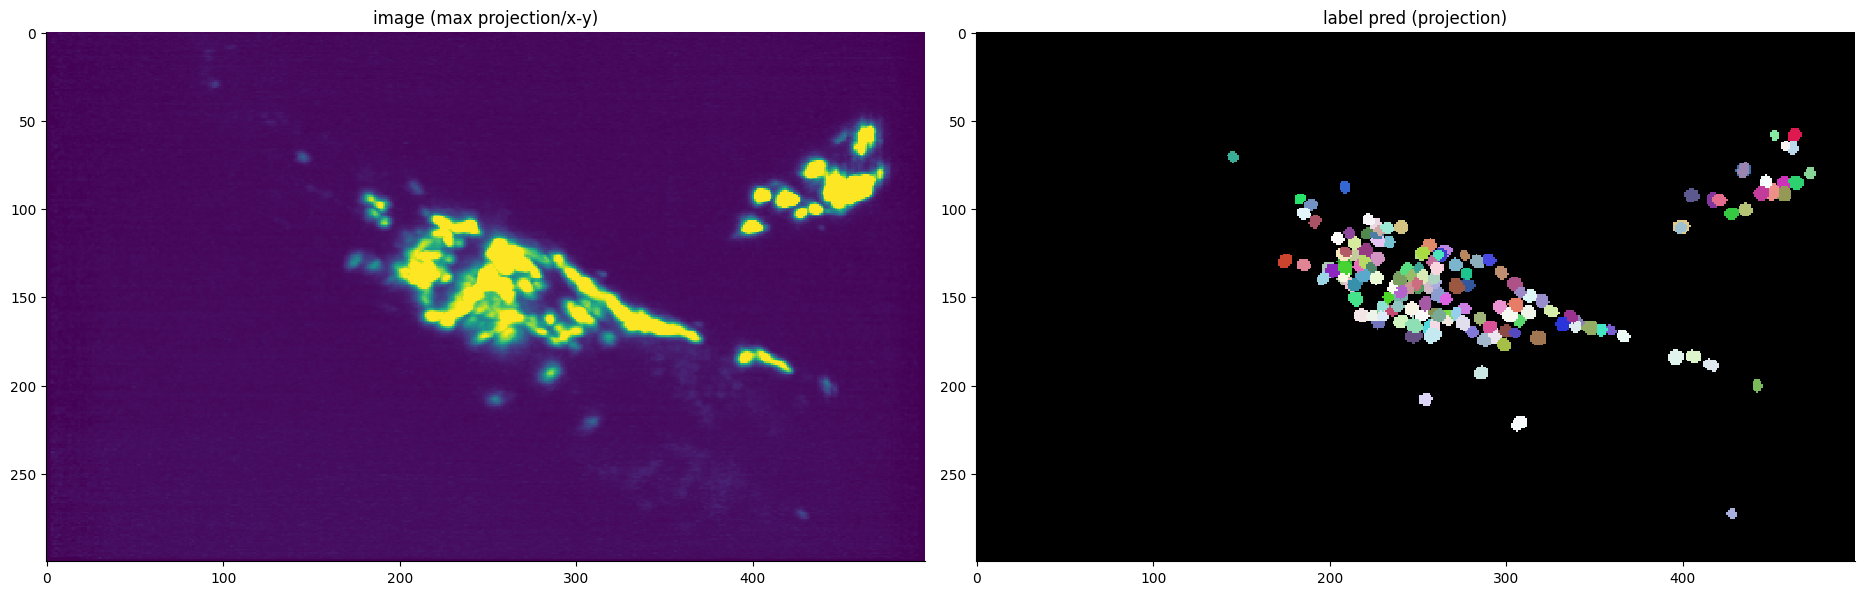

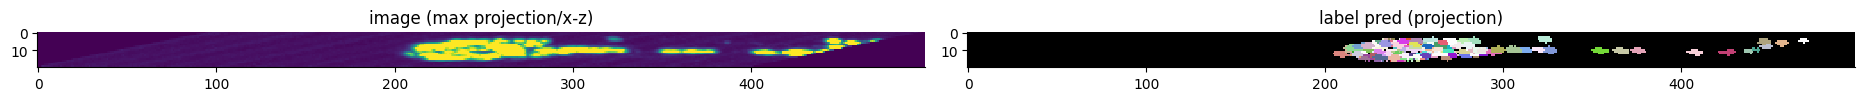

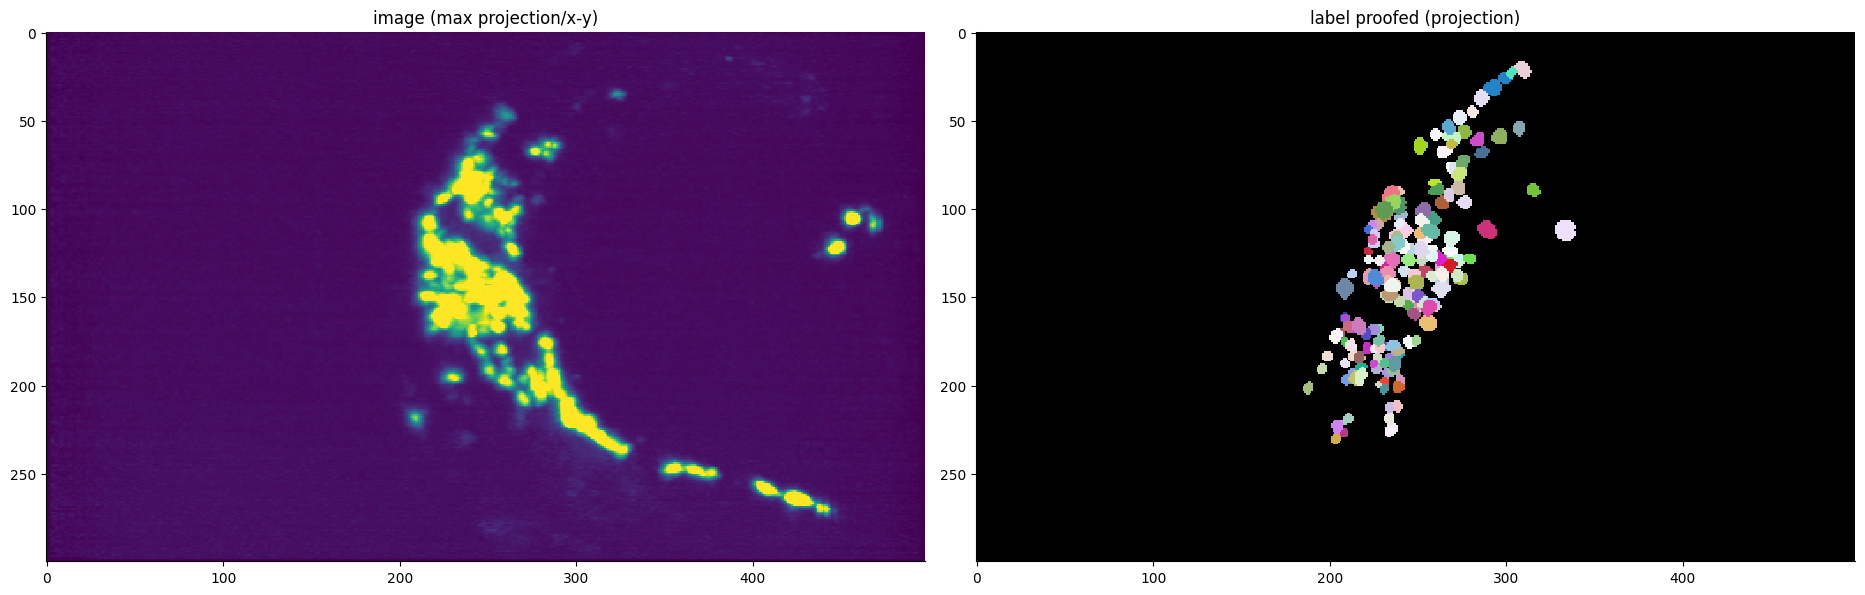

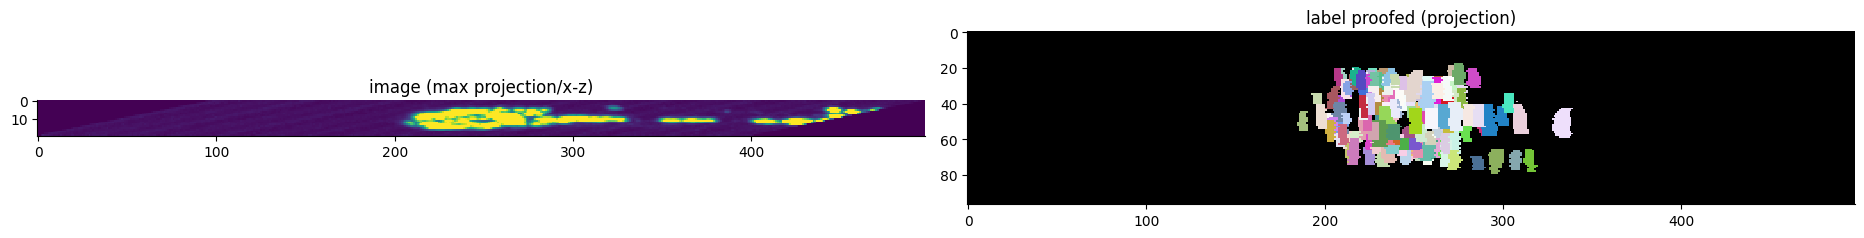

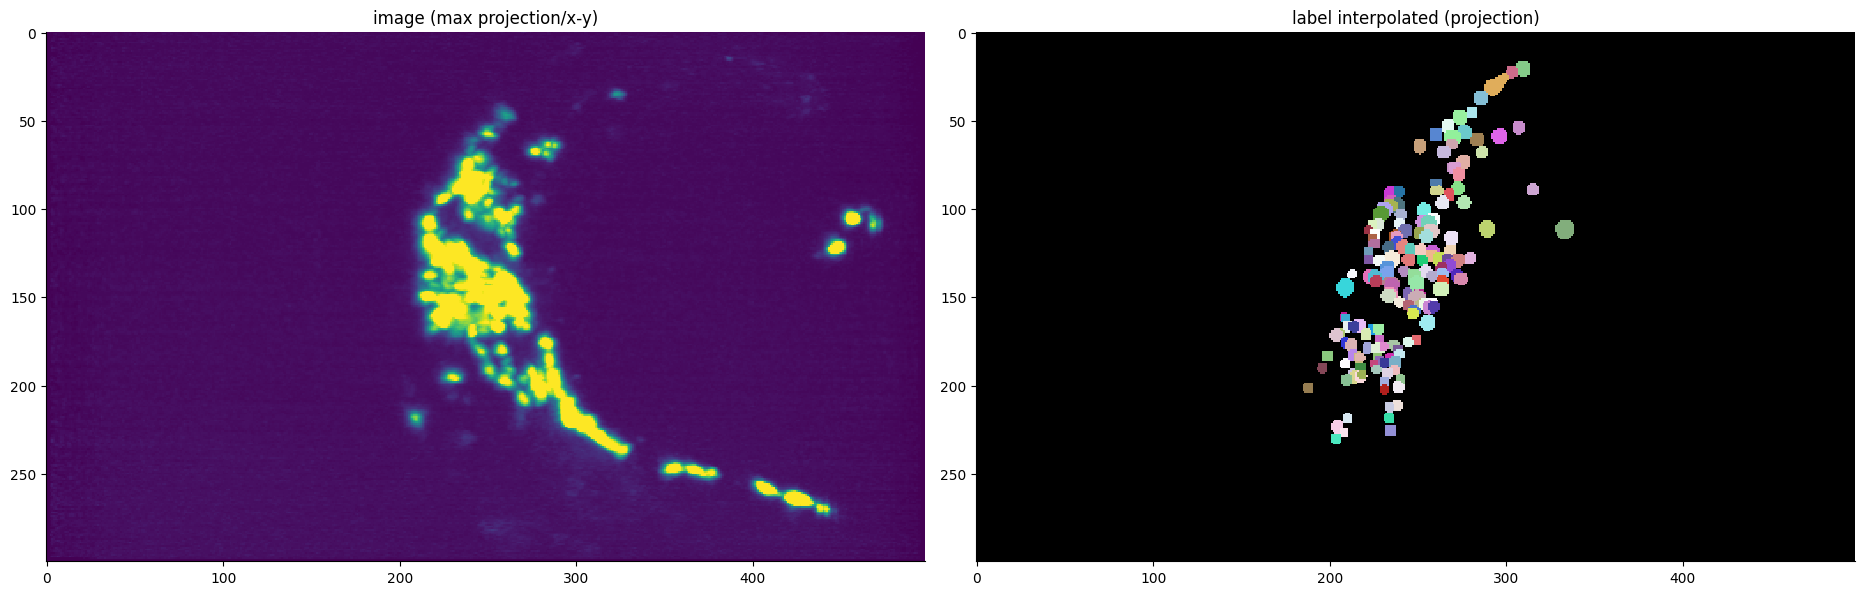

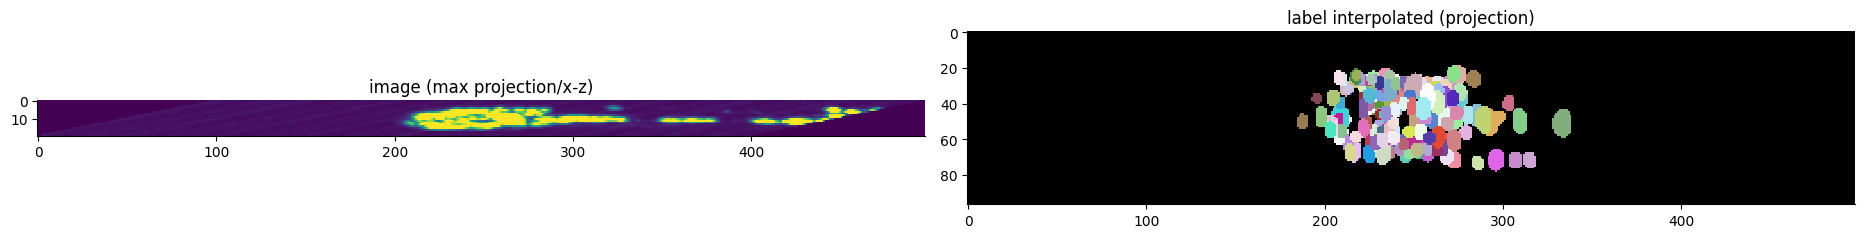

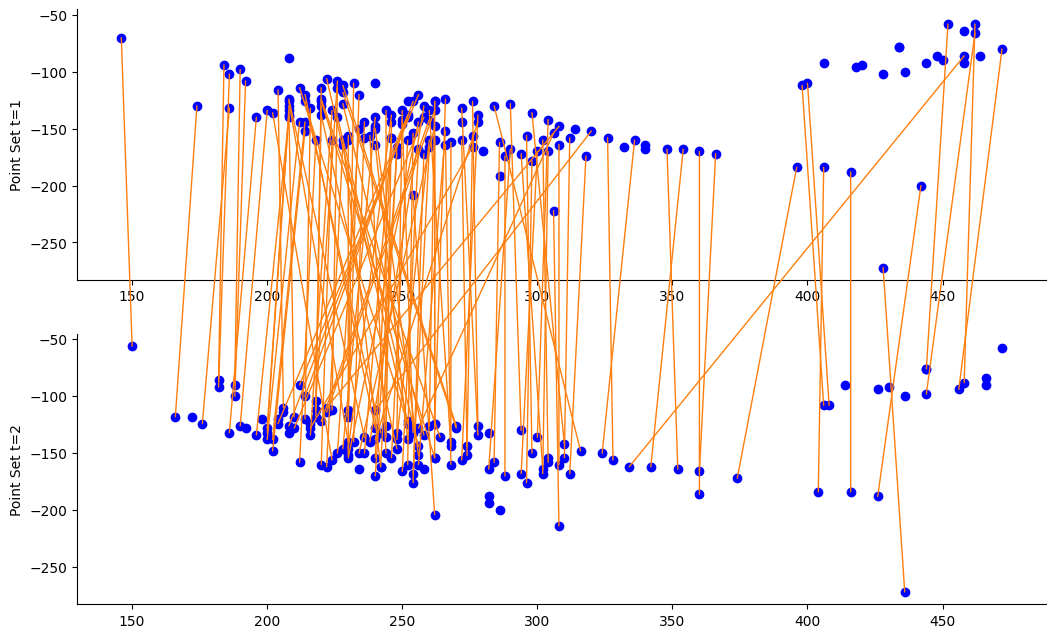

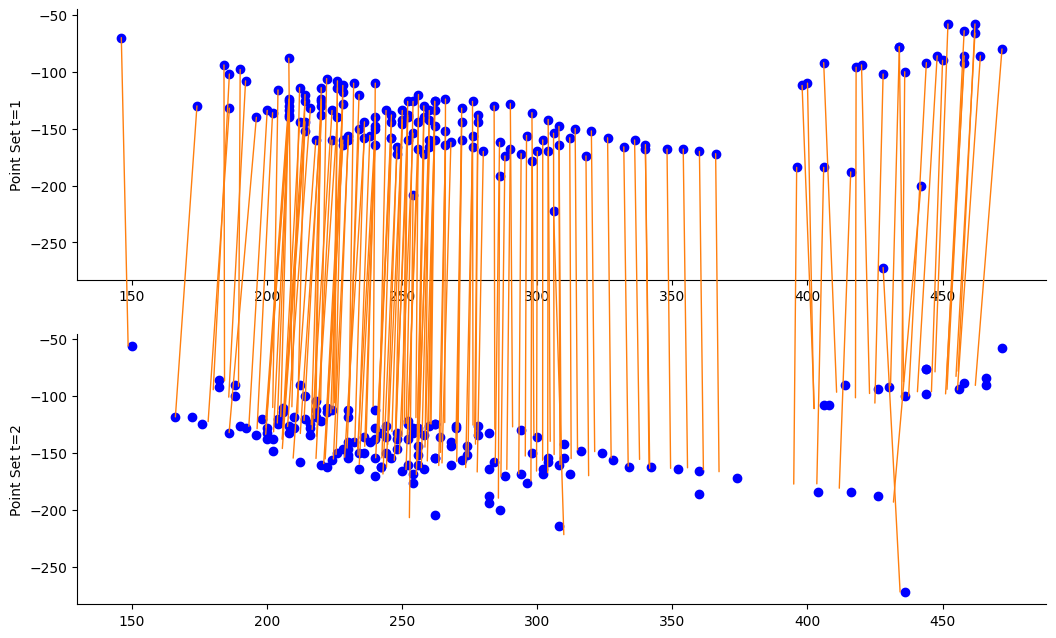

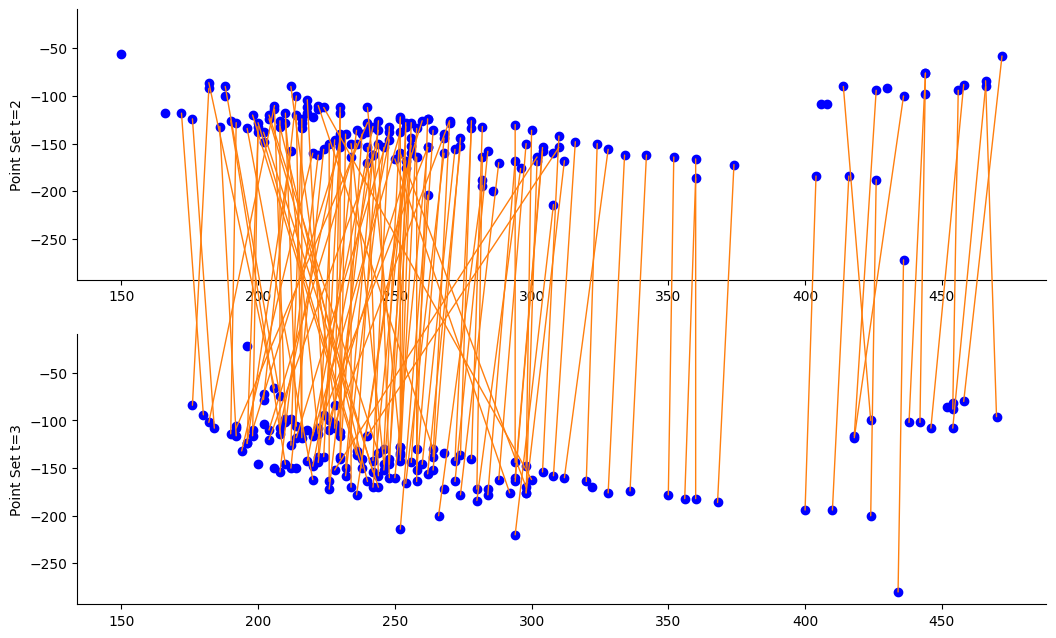

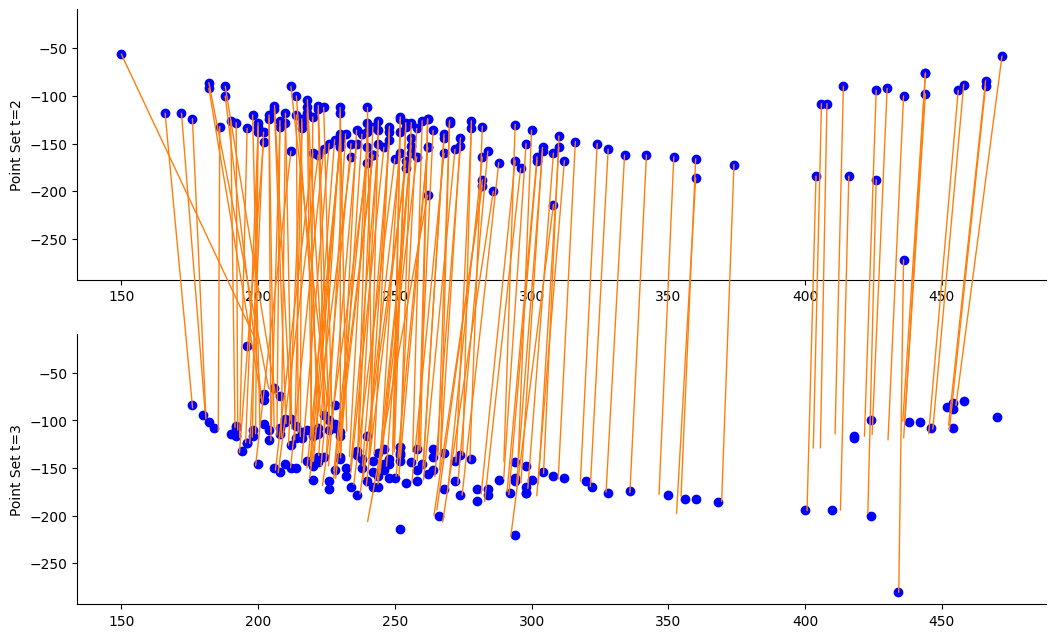

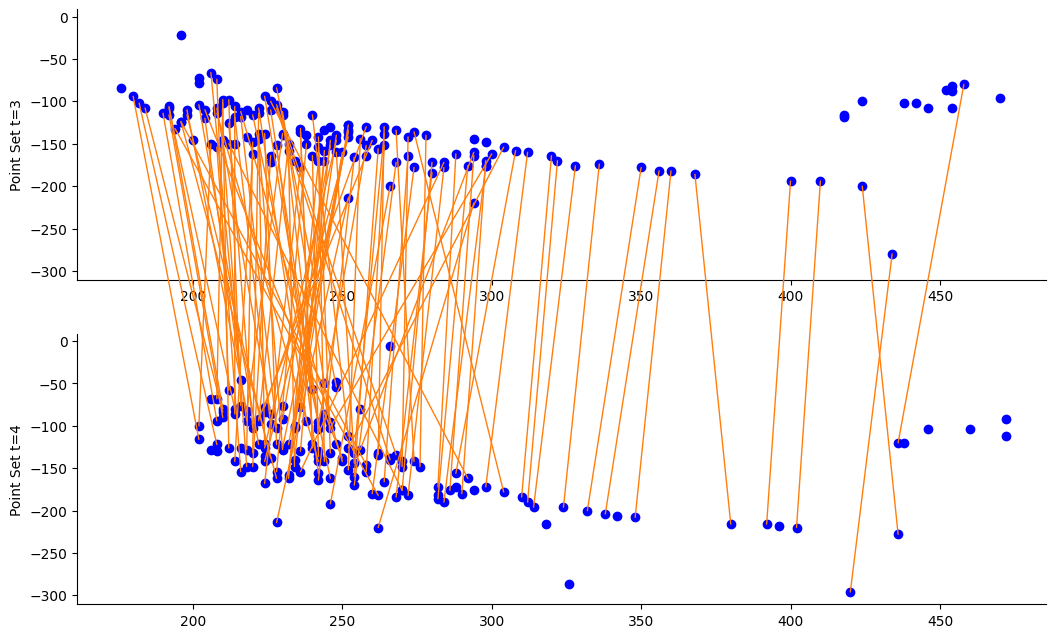

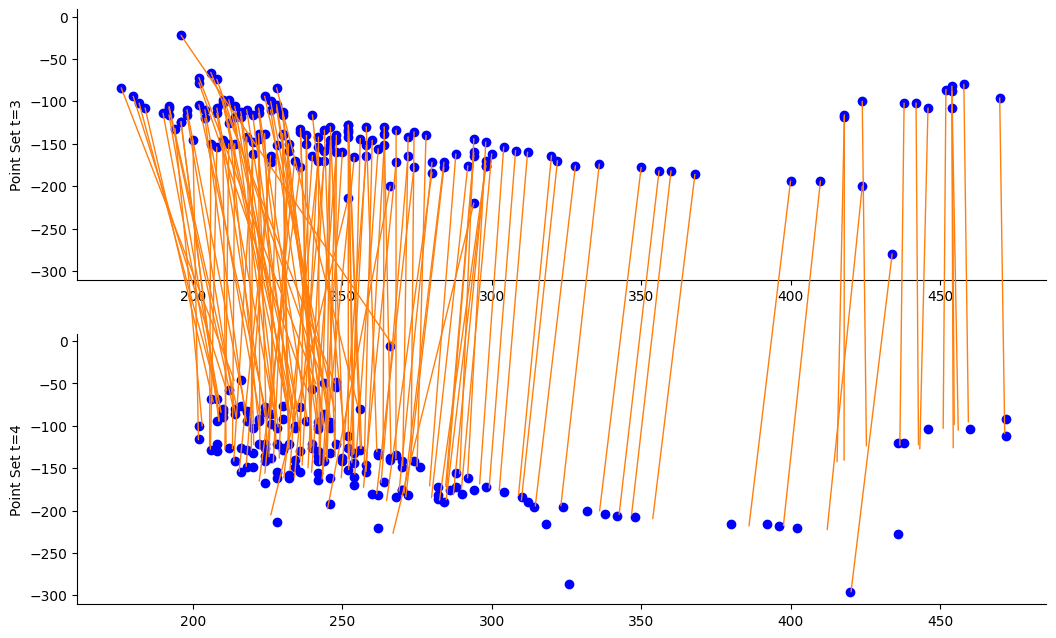

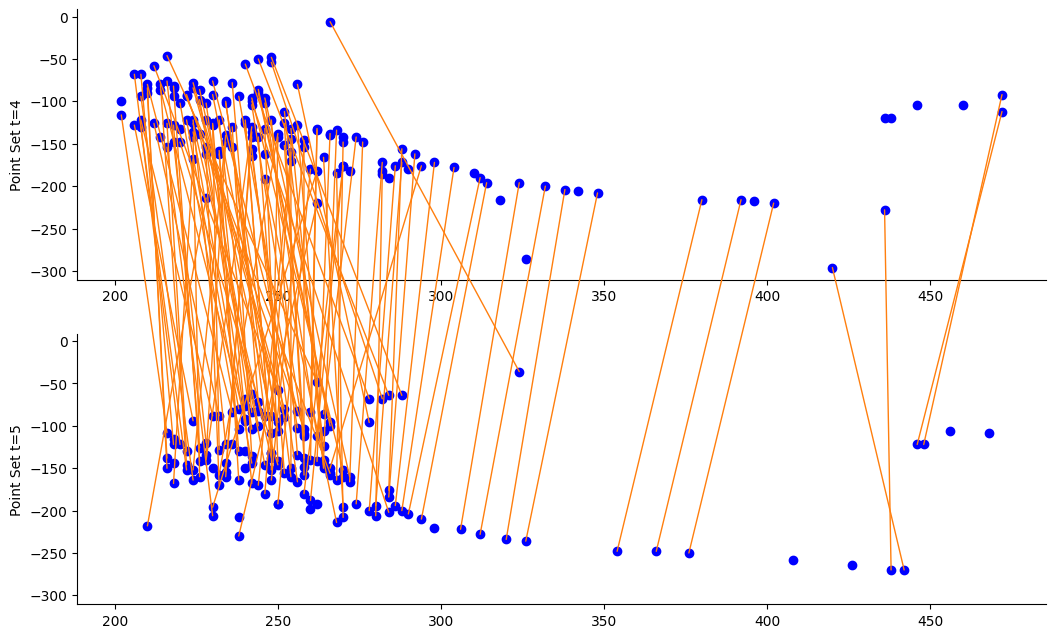

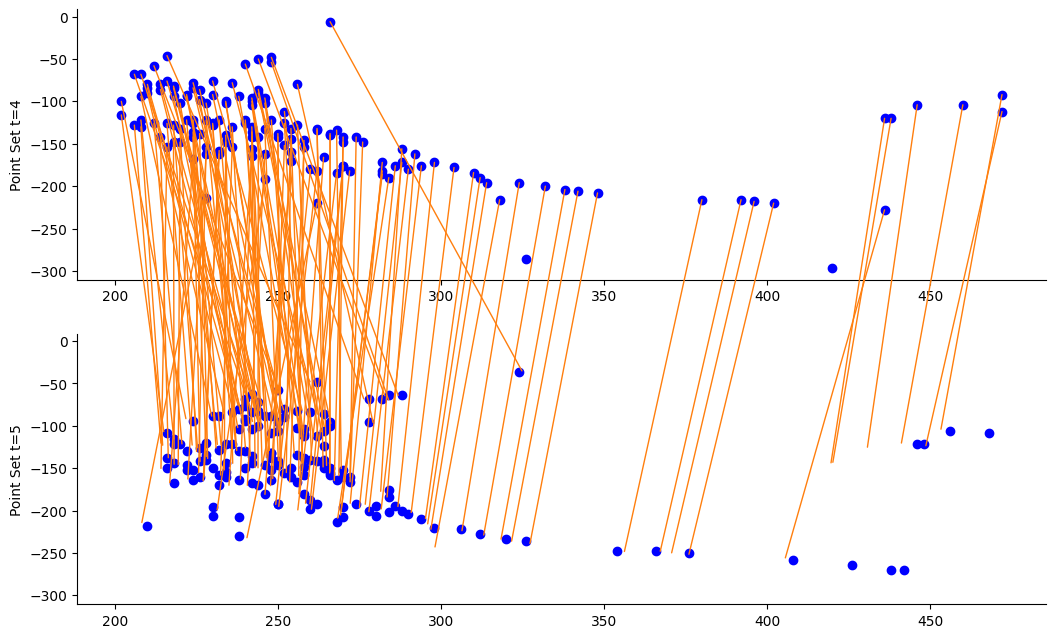

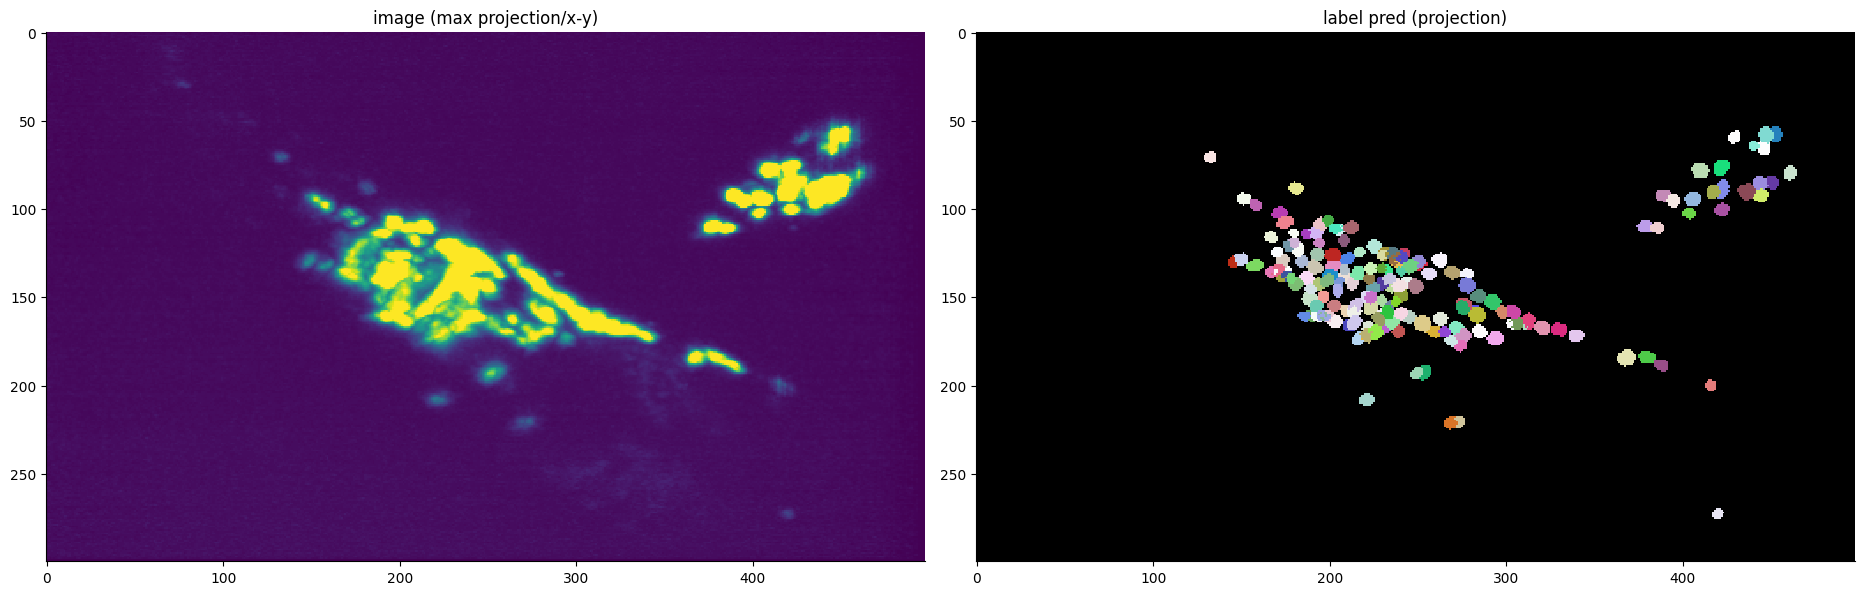

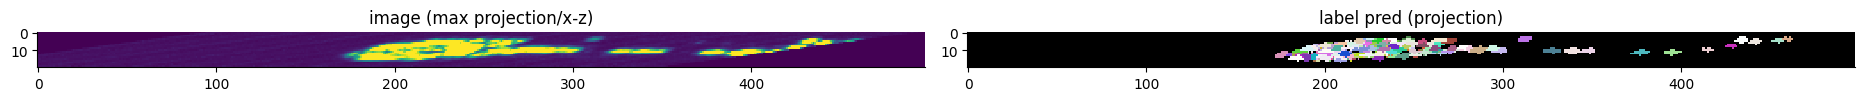

In [12]:
hdf5_folder_path = "D:/c.elegans/fluorescence_image/240218_Mikami_artifical/240217" #hdf5が入っているフォルダのpath

manual_vol1_path = "D:/c.elegans/3DeeCellTracker_result/20231101-175925tdTomato/raw/manual_vol1/image.tif"#マニュアルセグメンテーションデータが入っているファイル


volume = 5

ensemble = False

dz ="2000um" # 400umだけについて実行


sampling_number = 10
##ここまでを指定

extension = "h5"

search_name = dz + "dz_raw_gzip"
files = [h for h in os.listdir(hdf5_folder_path) if h.endswith(extension)]

for file_name in files:

    if search_name in file_name:

        print("\n\n\n"+file_name+" is under processing\n\n\n")
            
        hdf5_file_path = os.path.join(hdf5_folder_path, file_name)

        path_results = os.path.join(hdf5_folder_path, file_name + "_track_result")

        path_raw_images = {"h5_file":hdf5_file_path,
                            "dset":"default",
                            "channel": 0}

        # Load raw image at vol 1
        vol = 1
        x = sdw.load_2d_slices_at_time(images_path=path_raw_images, t=vol)
        print(f"Raw image shape at vol1: {x.shape}")

        (labels, details), prob_map = model.predict_instances(x)
        use_8_bit = True if labels.max() <= 255 else False

        sdw.plot_img_label_max_projection(x, labels, lbl_title="label pred (projection)", fig_width_px=1800)
        for vol in range(volume):
            vol = vol+1 #保存したいボリュームを入力

            x = sdw.load_2d_slices_at_time(images_path=path_raw_images, t=vol)
            print(f"Raw image shape at vol1: {x.shape}")

            (labels, details), prob_map = model.predict_instances(x)
            use_8_bit = True if labels.max() <= 255 else False

            print(labels.shape)

            output_path = os.path.join(path_results,"track_results","auto_segmentation_by_stardist")

            if not os.path.exists(output_path):
                os.makedirs(output_path)


            file_name = f"auto_labels_t={vol}.tif"
            file_path = os.path.join(output_path, file_name)

            tiff.imsave(file_path, labels)

            #sdw.plot_img_label_max_projection(x, labels, lbl_title="label pred (projection)", fig_width_px=1800)


        scale_z = 1

        sdw.plot_img_label_max_projection_xz(x, labels, lbl_title="label pred (projection)", fig_width_px=1800, scale_z=scale_z)

        sdw.predict_and_save(images_path=path_raw_images, model=model, results_folder=path_results)


        voxel_size=(1, 1, 1)


        manual_seg_path=manual_vol1_path

        coords2image = cit.CoordsToImageTransformer(results_folder=path_results, voxel_size=voxel_size)
        coords2image.load_segmentation(manual_vol1_path=manual_seg_path)
        sdw.plot_img_label_max_projection(x, coords2image.proofed_segmentation.transpose(2,0,1), lbl_title="label proofed (projection)", fig_width_px=1800)
        sdw.plot_img_label_max_projection_xz(x, coords2image.proofed_segmentation.transpose(2,0,1), lbl_title="label proofed (projection)", fig_width_px=1800, scale_z=scale_z)


        interpolation_factor = 1

        coords2image.interpolate(interpolation_factor=interpolation_factor)
        sdw.plot_img_label_max_projection(x, coords2image.auto_corrected_segmentation.transpose(2,0,1), lbl_title="label interpolated (projection)", fig_width_px=1800)
        sdw.plot_img_label_max_projection_xz(x, coords2image.auto_corrected_segmentation.transpose(2,0,1), lbl_title="label interpolated (projection)", fig_width_px=1800,scale_z=scale_z)

        ffn_model_name="ffn_worm4"

        tracker = trl.TrackerLite(results_dir=path_results, ffn_model_name=ffn_model_name, proofed_coords_vol1=coords2image.coord_vol1)

        for t1 in range(volume-1):
            t1 = t1+1
            t2 = t1+1

            tracker.match_by_ffn(t1=t1, t2=t2)

            beta = 3
            lambda_= 3

            tracked_positions_t2 = tracker.predict_cell_positions(path_result = path_results,t1=t1, t2=t2, beta=lambda_, lambda_=beta, draw_fig=True)

        # t_start = t_start
        # t_end = t_end
        
        # skipped_volumes = []

            # t1 = t_start
            # confirmed_coord = coords2image.coord_vol1
            # grid = model.config.grid
            # #for t in range(t_start+1, t_end+1):
            #     #print(f"t={t}...", end="\r")
            #     #if t in skipped_volumes:
            #         #print(f"skip t={t}")
            #         #continue
            #     #coord_prgls = tracker.predict_cell_positions(t1=t1, t2=t, confirmed_coord_t1=confirmed_coord, beta=beta, lambda_=lambda_, draw_fig=False)
            #     #confirmed_coord, corrected_labels_image = coords2image.accurate_correction(t, grid, coord_prgls, ensemble=ensemble)
            #     #coords2image.save_tracking_results(confirmed_coord, corrected_labels_image, tracker, t1=t1, t2=t, images_path=path_raw_images)
            #     #t1 = t

            # for t in range(t_start+1, t_end+1):
            #     print(f"t={t}...", end="\r")
            #     if t in skipped_volumes:
            #         print(f"skip t={t}")
            #         continue
            #     coord_prgls = tracker.predict_cell_positions_ensemble(skipped_volumes=skipped_volumes, t2=t, coord_t1=confirmed_coord, beta=beta, lambda_=lambda_, 
            #                                                         sampling_number=sampling_number, adjacent=True)
            #     confirmed_coord, corrected_labels_image = coords2image.accurate_correction(t, grid, coord_prgls, ensemble)
            #     coords2image.save_tracking_results(confirmed_coord, corrected_labels_image, tracker, t1=t1, t2=t, images_path=path_raw_images)

